# Project 3: Analyzing the Impact of Geopolitical Events on Global Stock Markets

**Author:** [Your Name]
**Date:** June 7, 2025

### 1. Project Objective
This project conducts an event study to analyze and visualize the impact of major geopolitical and political events of the 21st century on the performance and volatility of key global stock market indices. The goal is to move beyond news headlines and use daily market data to quantify how events create risk, uncertainty, and financial contagion in our interconnected world.

### 2. Key Questions
This analysis seeks to answer the following questions:
1. How do global markets react in the short-term window surrounding a major geopolitical shock?
2. Can we visually distinguish between the impact of a systemic global crisis and a localized political event?
3. How do the reactions of established markets (USA, UK, Japan) compare to those of major emerging markets (Brazil, India, China)?

### 3. Data Sources & Tools
* **Data Source:** Daily historical stock market data was sourced programmatically from **Yahoo Finance**.
* **Tools Used:** Python (Pandas, yfinance), Matplotlib, Seaborn, and Google Colab.

### 4. Data Acquisition & Preparation
The foundation of this analysis is a clean, consistently formatted time-series dataset. The process involved two key parts: acquiring the market data and creating a structured log of our selected events.

**Process:**
* **Market Data Acquisition:** The `yfinance` Python library was used to download over two decades of daily price data for six global indices: the S&P 500 (USA), FTSE 100 (UK), Nikkei 225 (Japan), Bovespa (Brazil), NIFTY 50 (India), and the Shanghai Composite (China).
* **Data Cleaning:** The raw data included multiple price points (Open, High, Low, etc.). We isolated the `Close` price, which is the standard for this type of analysis. A crucial step was handling non-trading days and market holidays by using a forward-fill (`ffill`) method to ensure data continuity.
* **Calculating Daily Returns:** To compare the performance of indices with vastly different price levels, we converted the absolute prices into daily percentage returns using the `.pct_change()` method. This normalizes the data and allows for fair, apples-to-apples comparisons.
* **Creating the Event Log:** A structured DataFrame was created to hold the 15 geopolitical and political events for our study, with each event assigned a specific market reaction date.

In [1]:
# First, we need to ensure yfinance is installed
!pip install yfinance

import yfinance as yf
import pandas as pd

# --- Step 1: Define the UPDATED list of tickers ---
# We are adding '000001.SS' for the Shanghai Stock Exchange Composite Index.
tickers = ['^GSPC', '^FTSE', '^N225', '^BVSP', '^NSEI', '000001.SS']

# Define the date range
start_date = '2000-01-01'
end_date = '2025-05-01'

# --- Step 2: Download the data for all 6 indices ---
print(f"Downloading daily market data for: {tickers}...")
market_data = yf.download(tickers, start=start_date, end=end_date)
print("Download complete.")

# --- Step 3: Extract and Clean the 'Close' Prices ---
print("\nExtracting and cleaning 'Close' prices...")
close_prices = market_data['Close'].copy()
close_prices.ffill(inplace=True)
close_prices.bfill(inplace=True)

# Rename columns for readability, including our new index
close_prices.rename(columns={
    '^GSPC': 'S&P 500 (USA)',
    '^FTSE': 'FTSE 100 (UK)',
    '^N225': 'Nikkei 225 (Japan)',
    '^BVSP': 'Bovespa (Brazil)',
    '^NSEI': 'NIFTY 50 (India)',
    '000001.SS': 'Shanghai Composite (China)'
}, inplace=True)

# --- Step 4: Calculate Daily Returns for all 6 indices ---
print("Calculating daily returns...")
daily_returns = close_prices.pct_change() * 100
daily_returns = daily_returns.dropna(axis=0, how='all')

# --- Final Inspection ---
print("\n--- Updated Daily Returns DataFrame ---")
print("The 'Shanghai Composite' has now been added.")
print(daily_returns.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed

Download complete.

Extracting and cleaning 'Close' prices...
Calculating daily returns...

--- Updated Daily Returns DataFrame ---
The 'Shanghai Composite' has now been added.
Ticker      Shanghai Composite (China)  Bovespa (Brazil)  FTSE 100 (UK)  \
Date                                                                      
2000-01-04                    0.000000         -6.373302       0.000000   
2000-01-05                    0.235431          2.485648      -1.950224   
2000-01-06                    3.849096         -0.849492      -1.357115   
2000-01-07                    3.597273          1.254113       0.893405   
2000-01-10                    1.879730          4.371819       1.581915   

Ticker      S&P 500 (USA)  Nikkei 225 (Japan)  NIFTY 50 (India)  
Date                                                             
2000-01-04      -3.834467            0.000000               0.0  
2000-01-05       0.192218           -2.422312               0.0  
2000-01-06       0.095568        

In [2]:
# --- Corrected Step 3.1: Isolate and Clean Close Prices ---

print("Extracting 'Close' prices using the correct column name...")

# Use 'Close' as discovered from our diagnostic step
close_prices = market_data['Close'].copy() # <<< CORRECTED

# --- Handle Missing Values ---
# This part of the logic remains the same.
print("Handling missing values using forward-fill...")
close_prices.ffill(inplace=True)
close_prices.bfill(inplace=True)

# --- Rename Columns for Readability ---
close_prices.rename(columns={
    '^GSPC': 'S&P 500 (USA)',
    '^FTSE': 'FTSE 100 (UK)',
    '^N225': 'Nikkei 225 (Japan)',
    '^BVSP': 'Bovespa (Brazil)',
    '^NSEI': 'NIFTY 50 (India)'
}, inplace=True)

# --- Inspect the Final Cleaned DataFrame ---
print("\n--- Cleaned DataFrame of Close Prices ---")
print("This DataFrame is now ready for analysis.")
print(close_prices.head())

print("\n--- Checking for any remaining null values ---")
print(close_prices.isnull().sum())

Extracting 'Close' prices using the correct column name...
Handling missing values using forward-fill...

--- Cleaned DataFrame of Close Prices ---
This DataFrame is now ready for analysis.
Ticker        000001.SS  Bovespa (Brazil)  FTSE 100 (UK)  S&P 500 (USA)  \
Date                                                                      
2000-01-03  1406.370972           16930.0    6665.899902    1455.219971   
2000-01-04  1406.370972           15851.0    6665.899902    1399.420044   
2000-01-05  1409.682007           16245.0    6535.899902    1402.109985   
2000-01-06  1463.942017           16107.0    6447.200195    1403.449951   
2000-01-07  1516.604004           16309.0    6504.799805    1441.469971   

Ticker      Nikkei 225 (Japan)  NIFTY 50 (India)  
Date                                              
2000-01-03        19002.859375       4494.649902  
2000-01-04        19002.859375       4494.649902  
2000-01-05        18542.550781       4494.649902  
2000-01-06        18168.26953

In [3]:
import pandas as pd

# --- Create the Final, Expanded Event Log DataFrame ---

# Step 1: Define all 15 events and their corresponding dates in a dictionary.
events = {
    '2001-09-17': '9/11 Attacks (Market Re-opens)',
    '2003-03-20': 'Start of Iraq War',
    '2008-09-15': 'Collapse of Lehman Brothers',
    '2014-05-16': 'Narendra Modi Elected in India',
    '2016-06-24': 'Brexit Referendum Result',
    '2016-11-09': 'Donald Trump 2016 Election Victory',
    '2018-03-22': 'Start of US-China Trade War',
    '2018-10-29': 'Jair Bolsonaro Elected in Brazil (Market Reaction)',
    '2020-11-09': 'Joe Biden 2020 Election Victory',
    '2020-11-26': 'Start of Major Farmer Protests in India',
    '2022-02-24': 'Full-scale Invasion of Ukraine',
    '2023-01-09': 'Attack on Brazilian Congress (Market Reaction)',
    '2023-10-09': 'Start of Israel-Hamas War',
    '2024-11-06': 'Donald Trump 2024 Election Victory',
    '2025-04-02': 'Trump Tariff Announcement'
}

# Step 2: Create a DataFrame from the dictionary
df_events = pd.DataFrame(list(events.items()), columns=['Date', 'Event'])

# Step 3: Convert the 'Date' column to a proper datetime format
df_events['Date'] = pd.to_datetime(df_events['Date'])

# Step 4: Sort events by date to create a chronological log
df_events = df_events.sort_values(by='Date').reset_index(drop=True)

# Step 5: Display the final event log
print("--- Final, Expanded Geopolitical Event Log ---")
print(df_events)
print("\n")
df_events.info()

--- Final, Expanded Geopolitical Event Log ---
         Date                                              Event
0  2001-09-17                     9/11 Attacks (Market Re-opens)
1  2003-03-20                                  Start of Iraq War
2  2008-09-15                        Collapse of Lehman Brothers
3  2014-05-16                     Narendra Modi Elected in India
4  2016-06-24                           Brexit Referendum Result
5  2016-11-09                 Donald Trump 2016 Election Victory
6  2018-03-22                        Start of US-China Trade War
7  2018-10-29  Jair Bolsonaro Elected in Brazil (Market React...
8  2020-11-09                    Joe Biden 2020 Election Victory
9  2020-11-26            Start of Major Farmer Protests in India
10 2022-02-24                     Full-scale Invasion of Ukraine
11 2023-01-09     Attack on Brazilian Congress (Market Reaction)
12 2023-10-09                          Start of Israel-Hamas War
13 2024-11-06                 Donald Trump 

In [4]:
# --- Calculate Daily Percentage Returns ---

# Use the .pct_change() method to calculate the daily return
# We multiply by 100 to express it as a percentage.
daily_returns = close_prices.pct_change() * 100

# The first row will be NaN because there's no previous day to compare to.
# We can simply drop this first row.
daily_returns = daily_returns.dropna(axis=0, how='all')


# --- Inspect the Returns Data ---
print("--- Daily Returns DataFrame ---")
print("Each cell represents the percentage change from the previous trading day.")
print(daily_returns.head())

print("\n--- Checking for any remaining null values ---")
print(daily_returns.isnull().sum())

--- Daily Returns DataFrame ---
Each cell represents the percentage change from the previous trading day.
Ticker      000001.SS  Bovespa (Brazil)  FTSE 100 (UK)  S&P 500 (USA)  \
Date                                                                    
2000-01-04   0.000000         -6.373302       0.000000      -3.834467   
2000-01-05   0.235431          2.485648      -1.950224       0.192218   
2000-01-06   3.849096         -0.849492      -1.357115       0.095568   
2000-01-07   3.597273          1.254113       0.893405       2.709040   
2000-01-10   1.879730          4.371819       1.581915       1.118997   

Ticker      Nikkei 225 (Japan)  NIFTY 50 (India)  
Date                                              
2000-01-04            0.000000               0.0  
2000-01-05           -2.422312               0.0  
2000-01-06           -2.018499               0.0  
2000-01-07            0.138377               0.0  
2000-01-10            0.000000               0.0  

--- Checking for any rem

### 5. Event Study Analysis & Visualization
The core of this project is the event study, where we isolate the market behavior around each specific event date.

#### Analysis 1: Deep Dive into a Single Event - The 2008 Financial Crisis
To illustrate the methodology, we first performed a detailed analysis of the market reaction to the collapse of Lehman Brothers on September 15, 2008. We analyzed a 21-day window (10 days before and 10 days after) and plotted the cumulative returns for each index.

**Analysis:**
The chart provides a stunning visualization of global financial contagion. All markets, both developed and emerging, plummeted in the days following the event, showing how interconnected the system is. However, a key insight was the unique "V-shaped" recovery of the Shanghai Composite index within the window. This highlighted the structural differences of China's state-managed, more insulated economy compared to the Western markets at the epicenter of the crisis.

#### Analysis 2: A Master Timeline of Market Performance & Key Events
To understand the long-term story, we created a normalized timeline chart of all six indices from 2000 to 2025. By setting the starting value of every index to 100, we can fairly compare their growth trajectories over time.

**Analysis:**
This visualization tells the economic story of the 21st century. It clearly shows the "lost decade" leading up to the 2008 financial crisis (**Event #3**) and the subsequent "two-speed" recovery. After 2009, we see a significant **divergence**, with the US market (**S&P 500**) and the Indian market (**NIFTY 50**) dramatically outperforming the more stagnant markets of the UK (**FTSE 100**) and Japan (**Nikkei 225**).

#### Analysis 3: Visualizing Market Fear - A Timeline of Volatility
Our final analysis looked not at price, but at risk. We calculated and plotted the 30-day rolling volatility to create a "seismograph" of global market fear.

**Analysis:**
This chart powerfully illustrates how geopolitical shocks inject uncertainty into the system. It clearly identifies the three greatest periods of market fear in the last 25 years: the 2008 Global Financial Crisis (**Event #3**), the onset of the COVID-19 Pandemic (**Event #6**), and the 2022 Invasion of Ukraine (**Event #11**). It also effectively distinguishes these systemic, global shocks from more localized political events like Brexit (**Event #4**) or the Brazilian elections (**#8**), which cause much smaller, more regionally-contained spikes in volatility.

### 6. Project Conclusion
This project successfully used real-world financial data to quantify and visualize the impact of geopolitical events. The key takeaways are:
* **Systemic vs. Regional Risk:** Global markets are highly interconnected and react in unison to major systemic shocks, but the impact of most national political events remains primarily localized.
* **The Power of Narrative:** The data clearly shows how surprising events (like Brexit) cause more volatility than anticipated events (like the Iraq War).
* **A Divergent World:** The post-2008 economic landscape has been defined by the dramatic outperformance of the US and key emerging markets like India relative to other established economies.

This event-driven analysis provides a clear, evidence-based perspective on how politics and finance are inextricably linked.

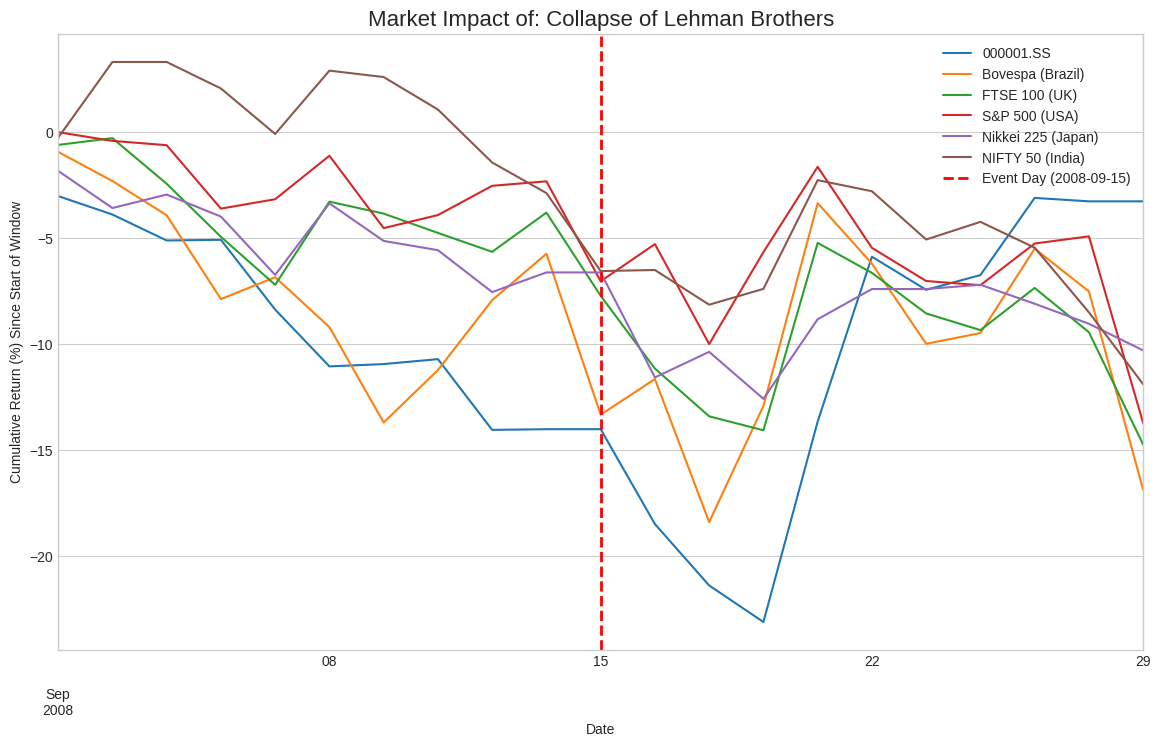

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Corrected Single Event Analysis: Lehman Brothers Collapse ---

# --- Step 1: Define the Event and the Analysis Window ---
event_name = 'Collapse of Lehman Brothers'
event_date = df_events.loc[df_events['Event'] == event_name, 'Date'].iloc[0]
window_days = 10

# --- Step 2: Get the index location of the event date ---
# THIS IS THE CORRECTED LINE:
# We use .searchsorted() to find the index position of our event date.
# 'side="left"' ensures we get the next trading day if the event is on a non-trading day.
event_index = daily_returns.index.searchsorted(event_date, side='left')

# --- Step 3: Slice the DataFrame for the Event Window ---
start_index = event_index - window_days
end_index = event_index + window_days + 1 # +1 to make the slice inclusive
event_window_returns = daily_returns.iloc[start_index:end_index]

# --- Step 4: Calculate Cumulative Returns ---
# We start with 0 and calculate the cumulative sum of daily returns.
cumulative_returns = (event_window_returns / 100).cumsum() * 100

# --- Step 5: Visualize the Event's Impact ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

cumulative_returns.plot(ax=plt.gca())

# Add plot details
plt.title(f'Market Impact of: {event_name}', fontsize=16)
plt.ylabel('Cumulative Return (%) Since Start of Window')
plt.xlabel('Date')

# Add a vertical line at Day 0 (the event day) for reference
# The actual date from the index might be the next day if the event was on a weekend
event_day_in_data = event_window_returns.index[window_days]
plt.axvline(x=event_day_in_data, color='red', linestyle='--', lw=2, label=f'Event Day ({event_date.date()})')

plt.legend()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define a Reusable Function for Plotting Event Impact ---

def plot_event_impact(event_name, event_date, returns_df, window_days=10):
    """
    Slices returns data around an event date, calculates cumulative returns,
    and generates a plot visualizing the market impact.

    Args:
        event_name (str): The name of the event for the chart title.
        event_date (pd.Timestamp): The date of the event.
        returns_df (pd.DataFrame): The DataFrame of daily returns.
        window_days (int): The number of trading days to show before and after the event.
    """

    # --- Step 1: Find the Event Date in the Market Data ---
    event_index = returns_df.index.searchsorted(event_date, side='left')

    # --- Step 2: Slice the DataFrame for the Event Window ---
    start_index = event_index - window_days
    end_index = event_index + window_days + 1

    # Ensure we don't go out of bounds
    if start_index < 0 or end_index > len(returns_df):
        print(f"Skipping '{event_name}' - event window is out of data bounds.")
        return

    event_window_returns = returns_df.iloc[start_index:end_index]

    # --- Step 3: Calculate Cumulative Returns ---
    cumulative_returns = (event_window_returns / 100).cumsum() * 100

    # --- Step 4: Visualize the Event's Impact ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 8))

    cumulative_returns.plot(ax=plt.gca())

    plt.title(f'Market Impact of: {event_name}', fontsize=16)
    plt.ylabel('Cumulative Return (%)')
    plt.xlabel('Date')

    # Get the actual trading day from the index for the vertical line
    event_day_in_data = event_window_returns.index[window_days]
    plt.axvline(x=event_day_in_data, color='red', linestyle='--', lw=2, label=f'Event Day ({event_date.date()})')

    plt.legend(title='Index')
    plt.show()

print("Function 'plot_event_impact' has been defined and is ready to use.")

Function 'plot_event_impact' has been defined and is ready to use.


--- Generating Impact Analysis for All 15 Geopolitical Events ---


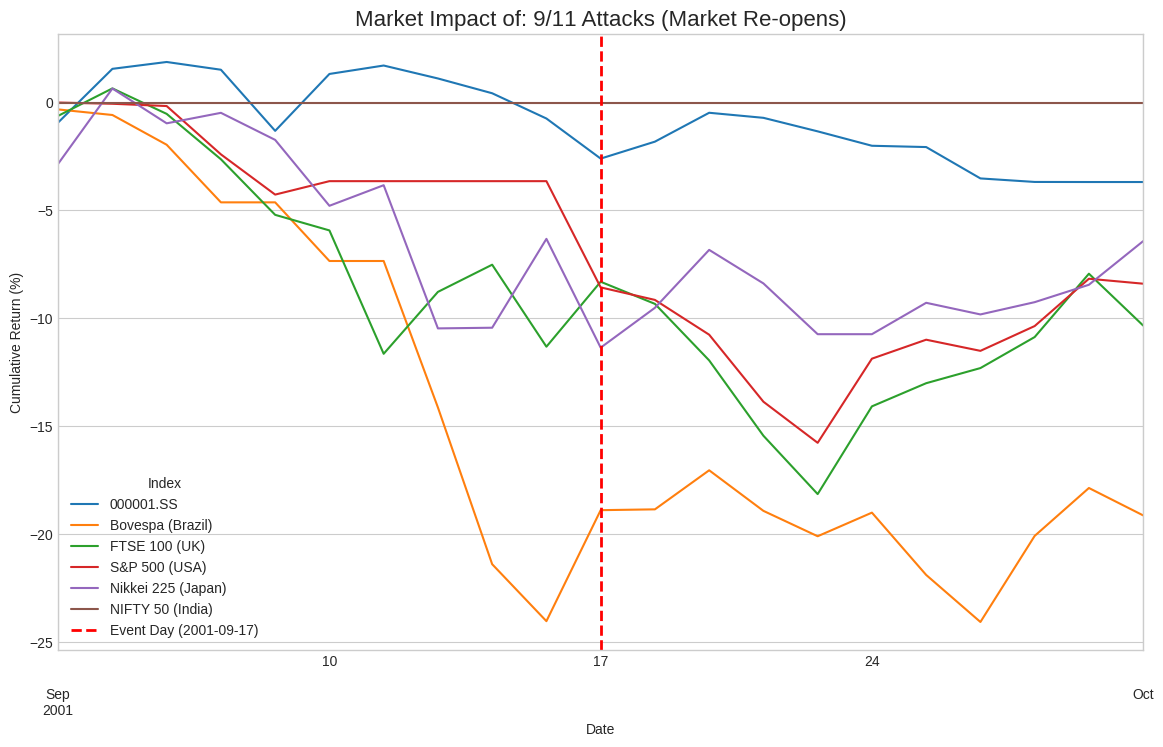

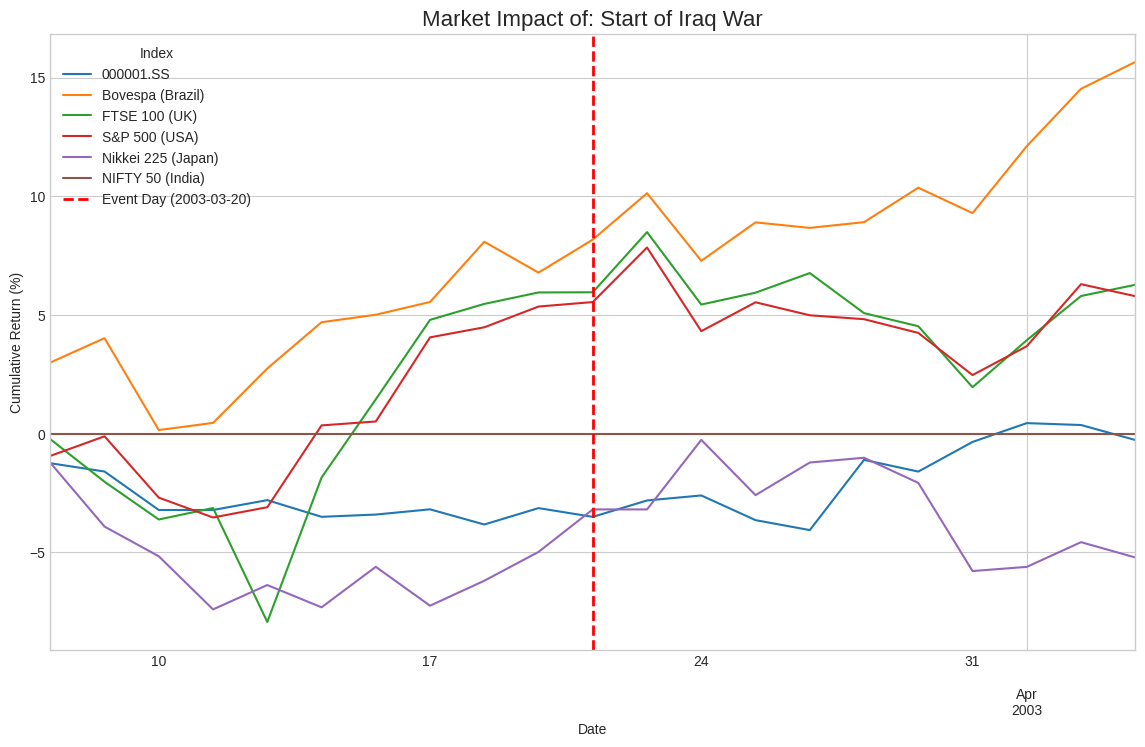

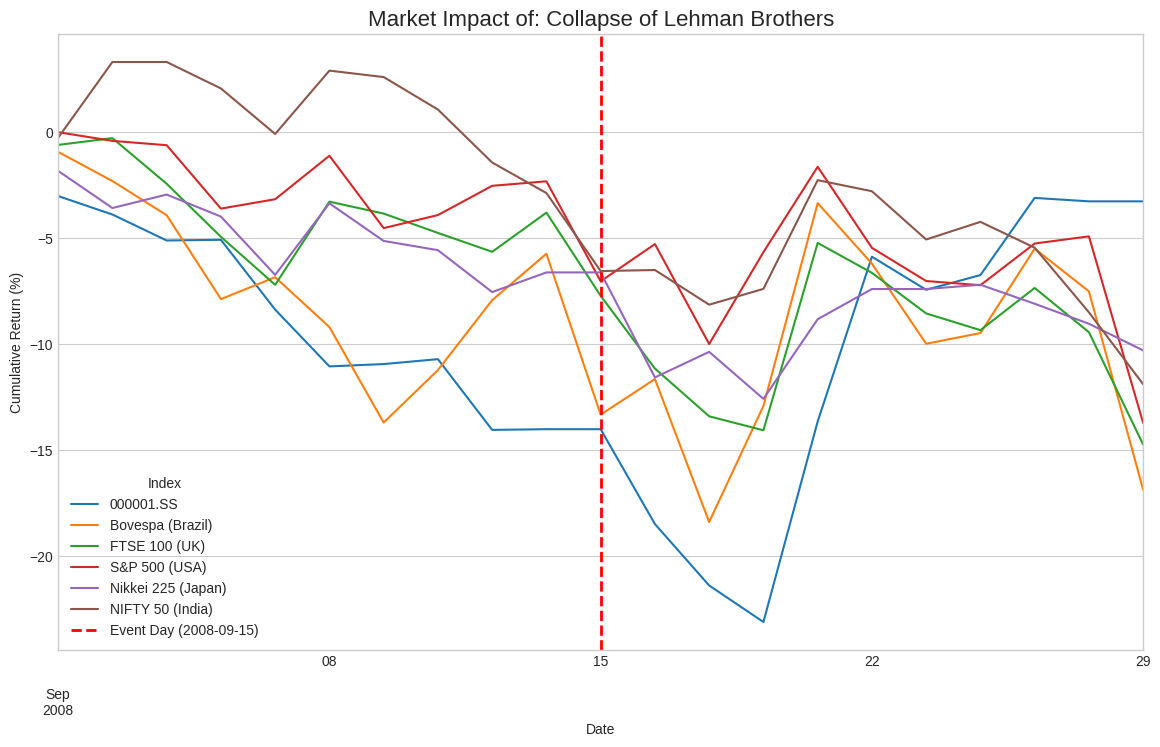

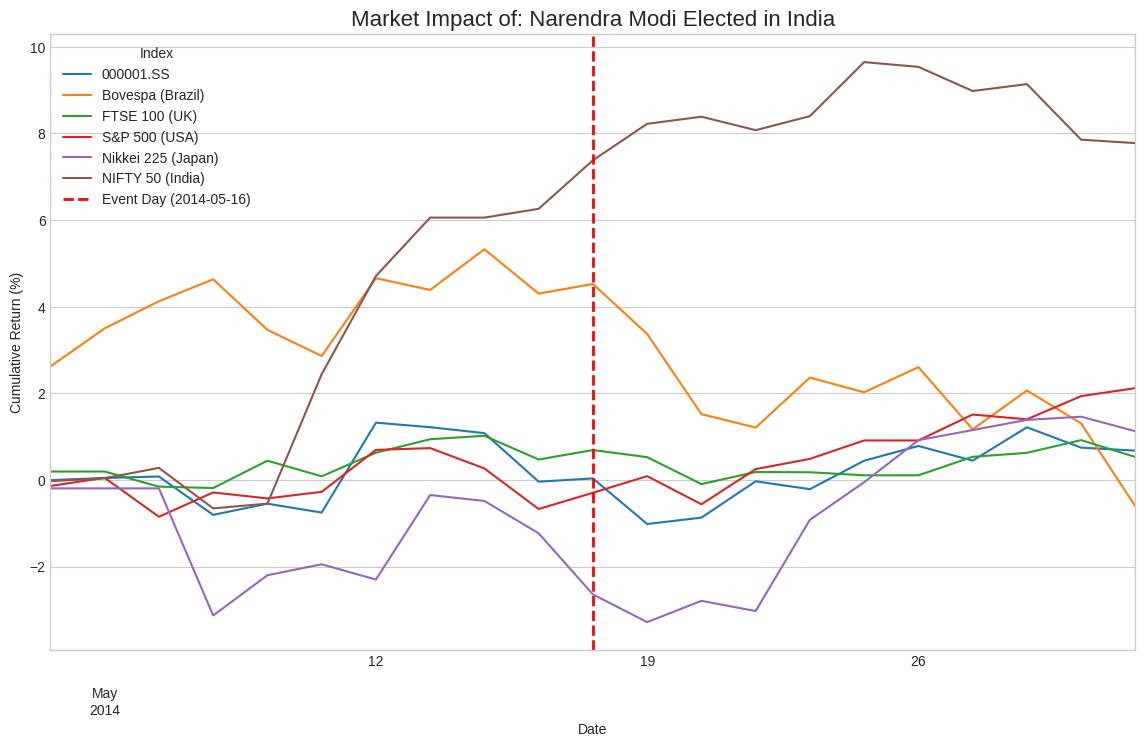

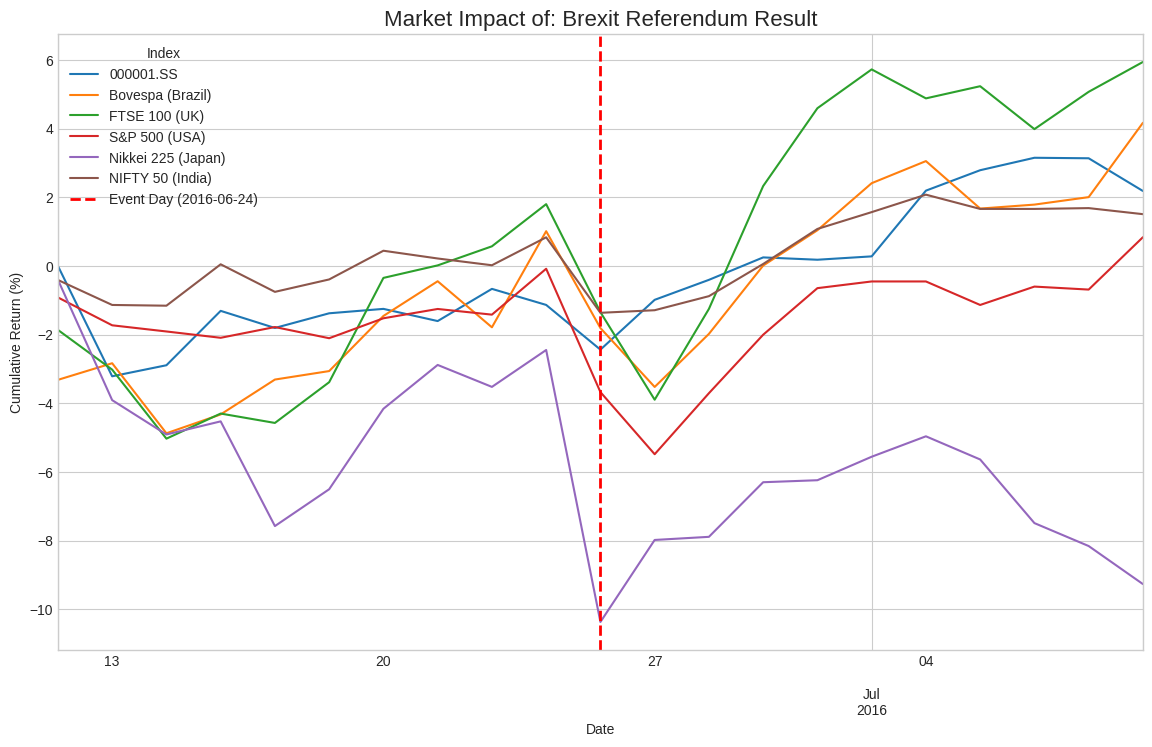

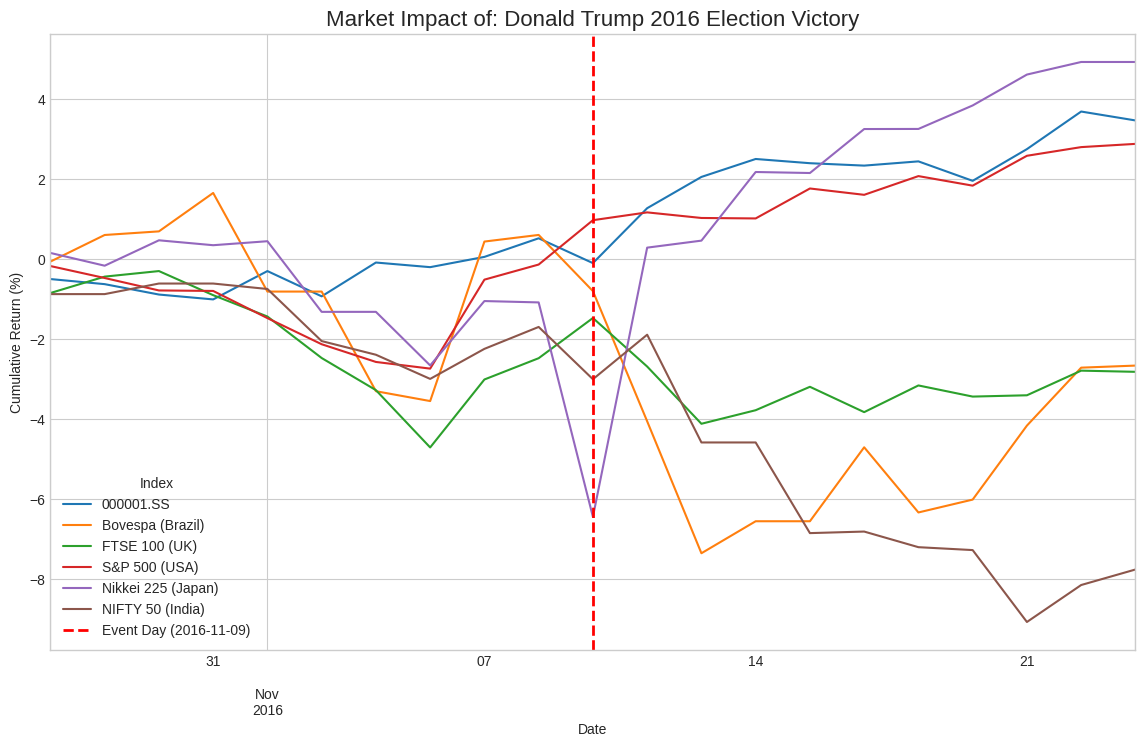

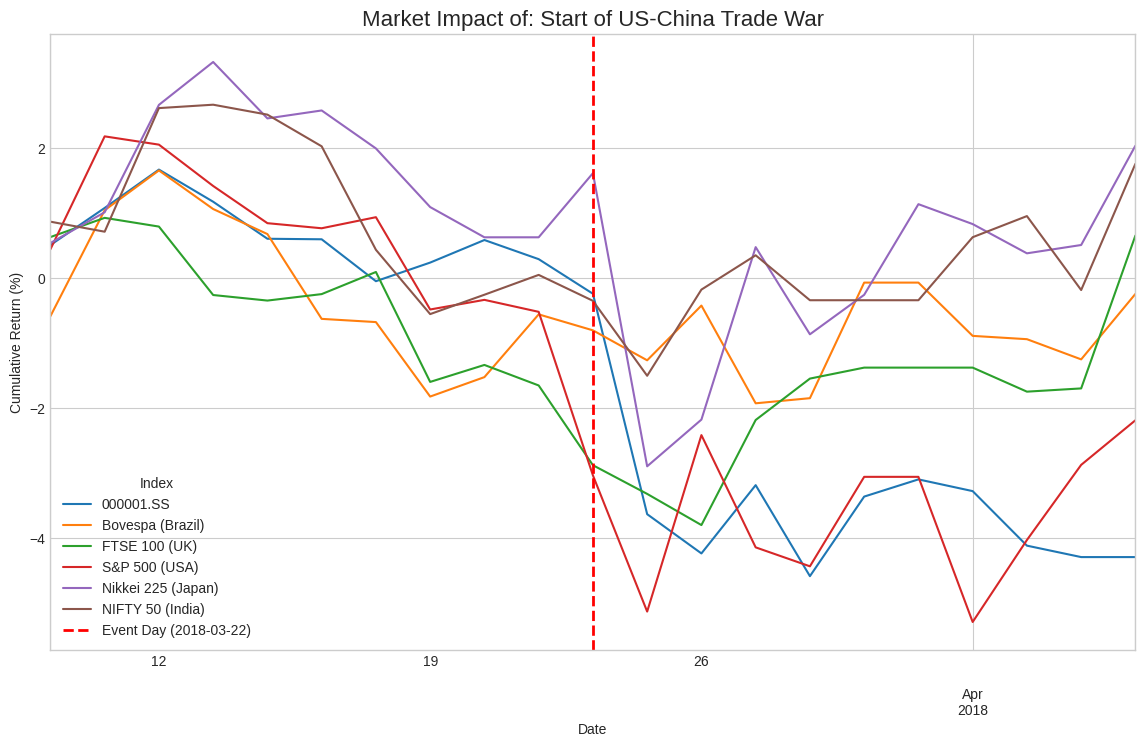

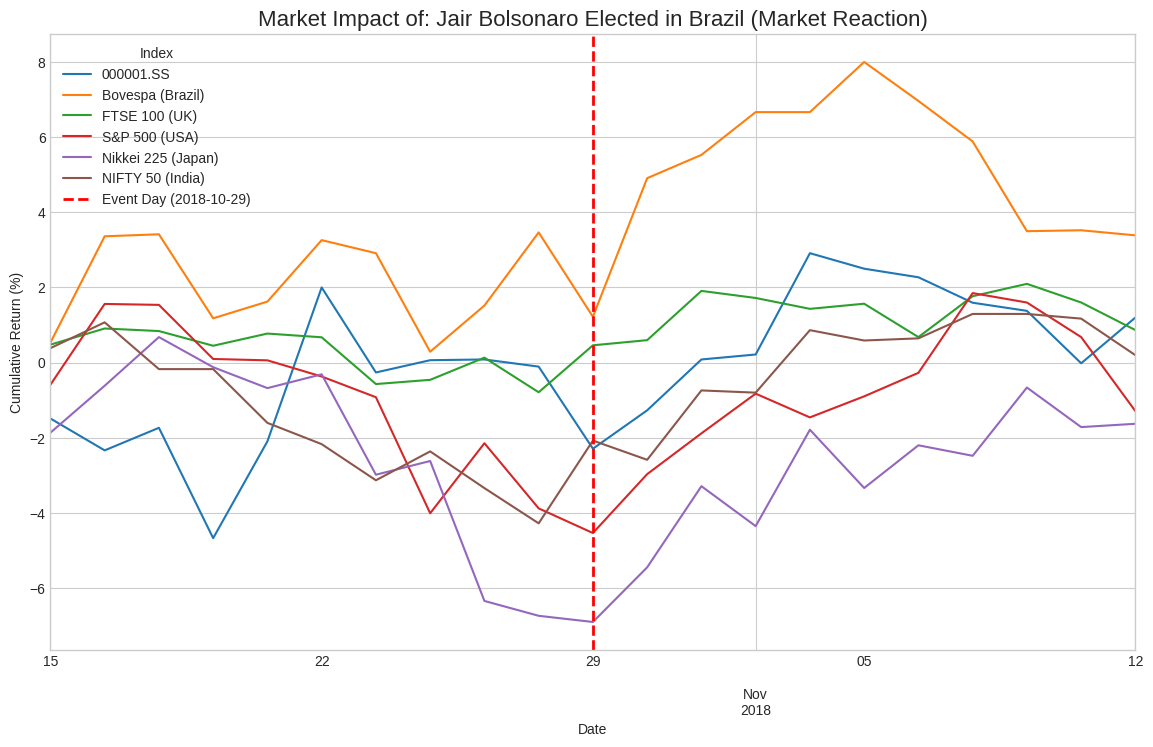

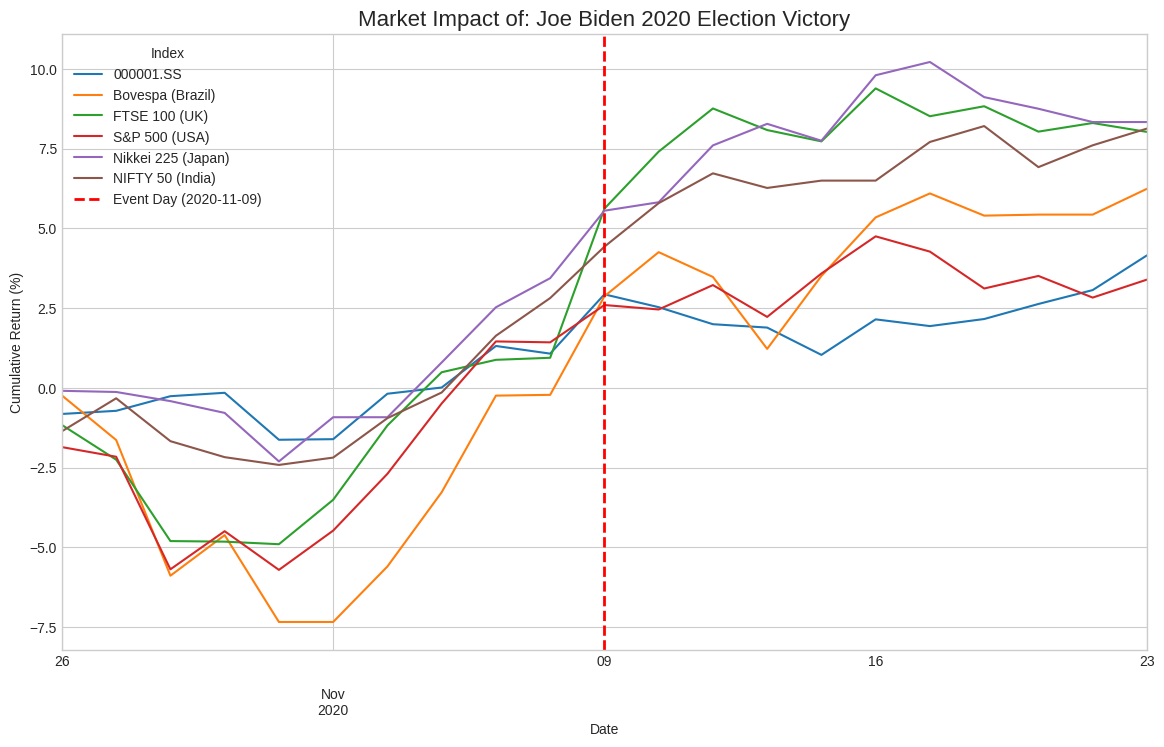

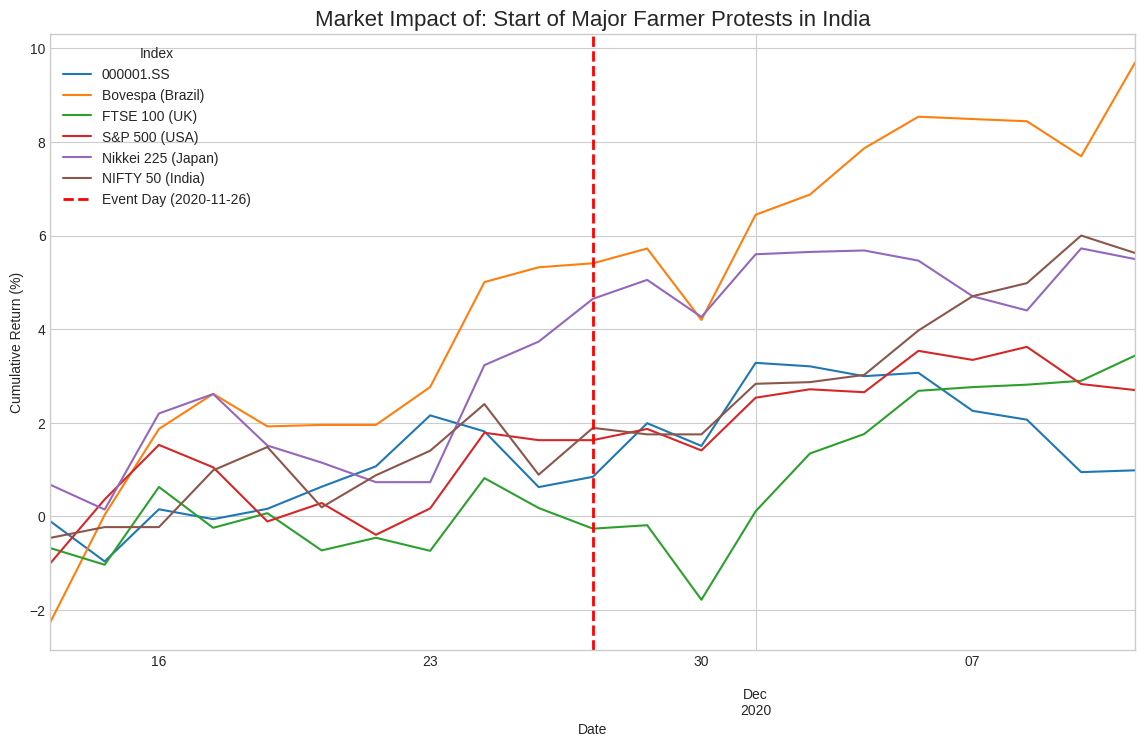

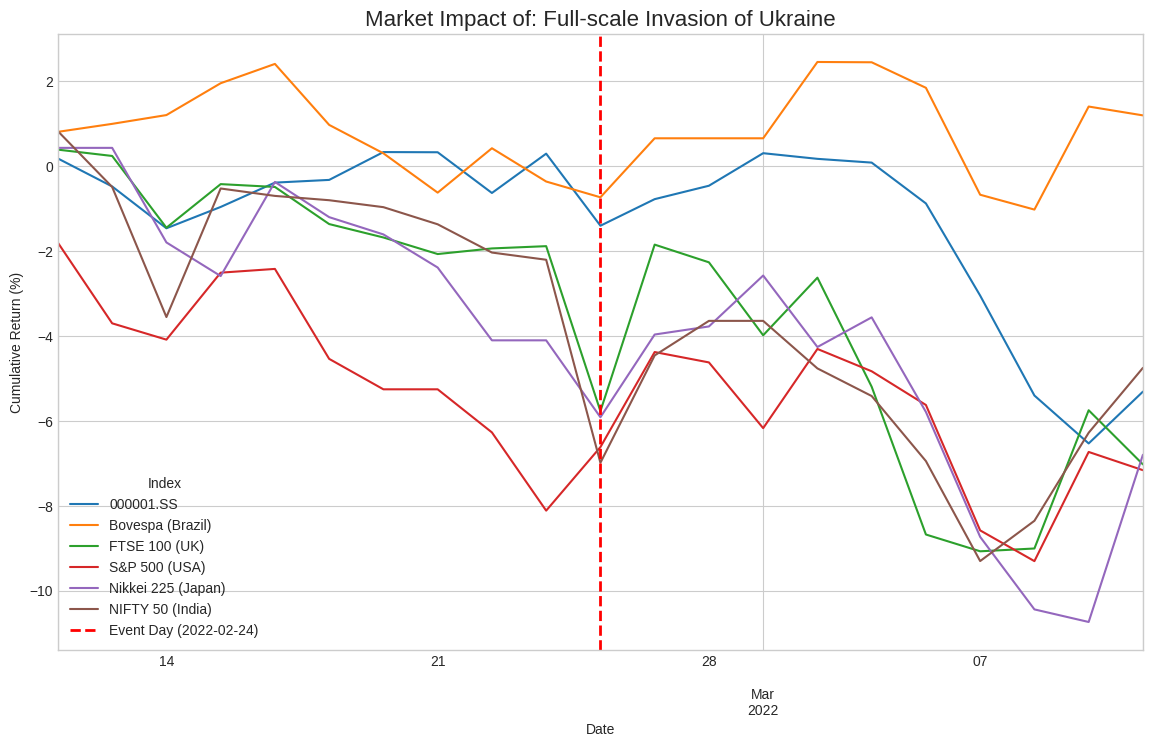

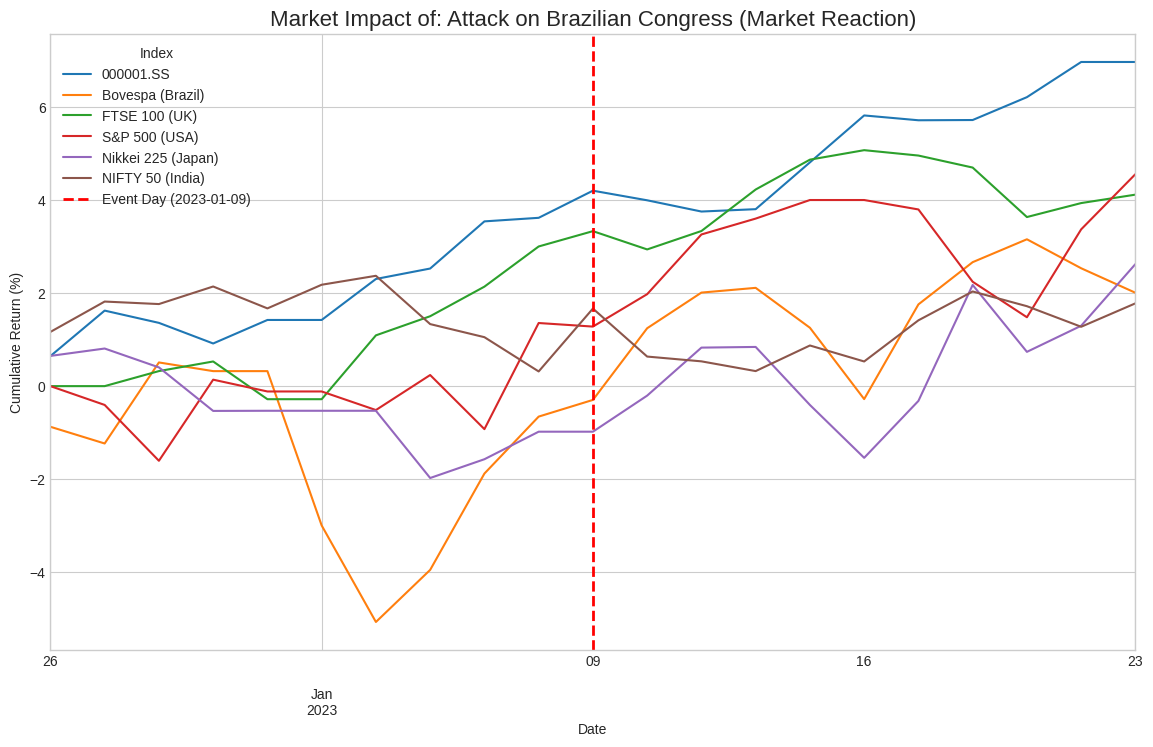

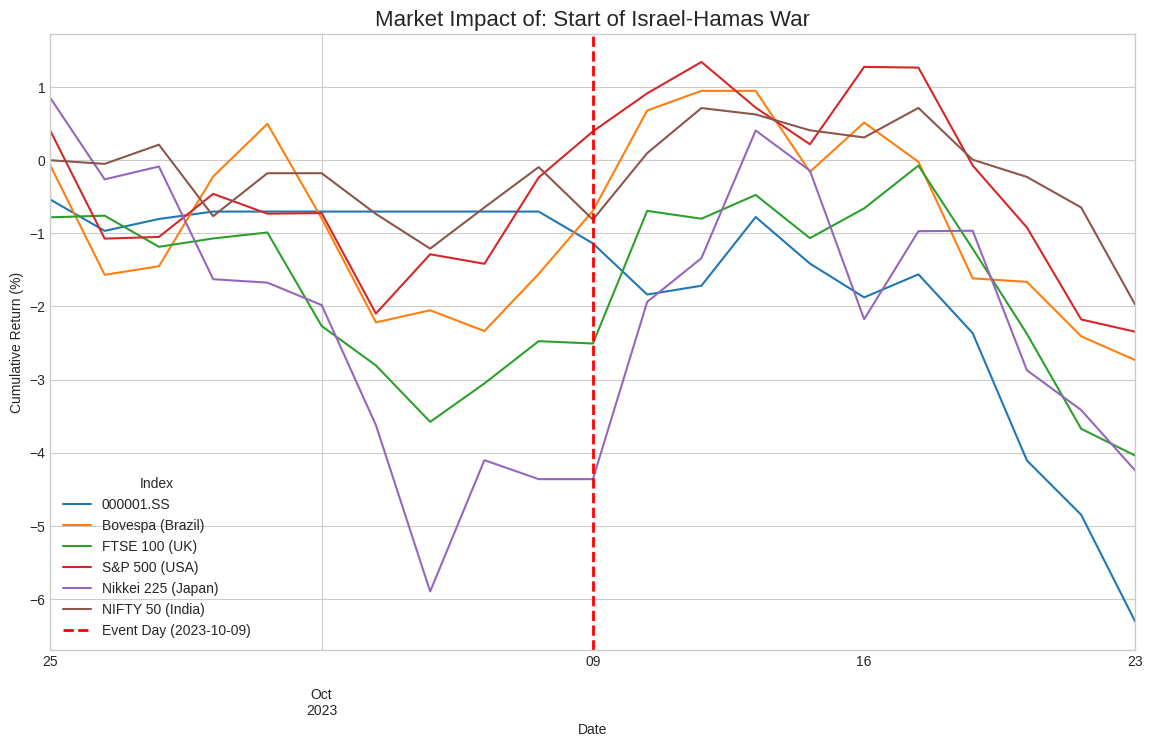

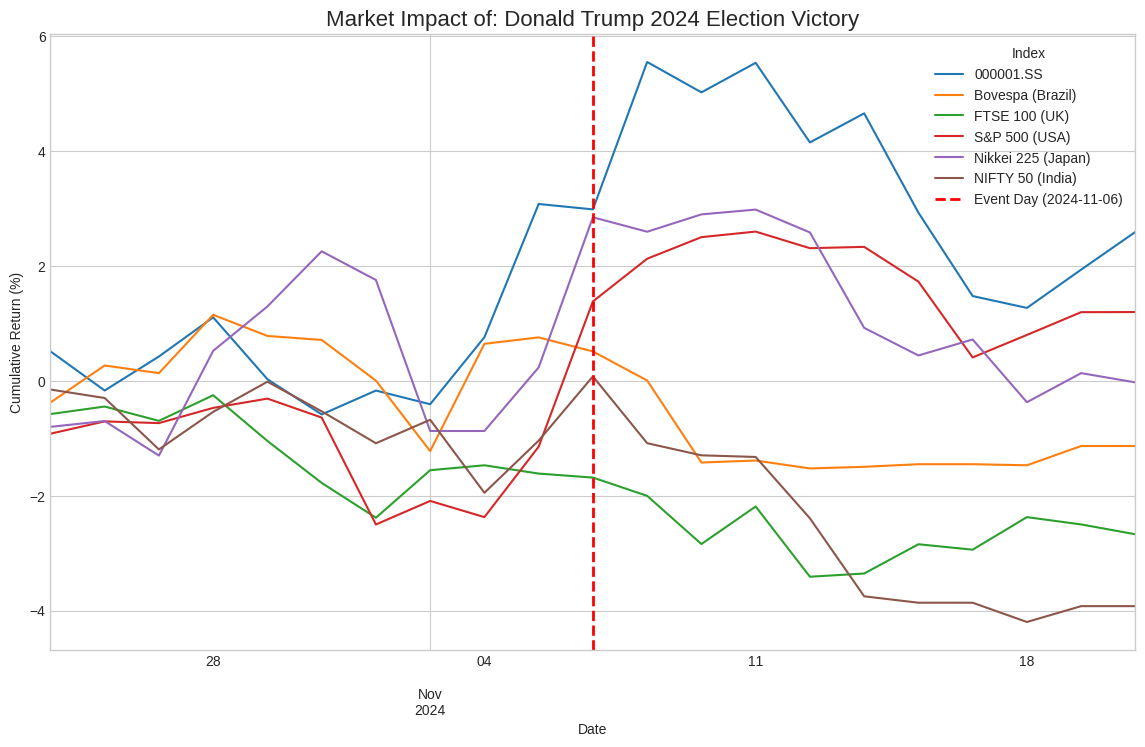

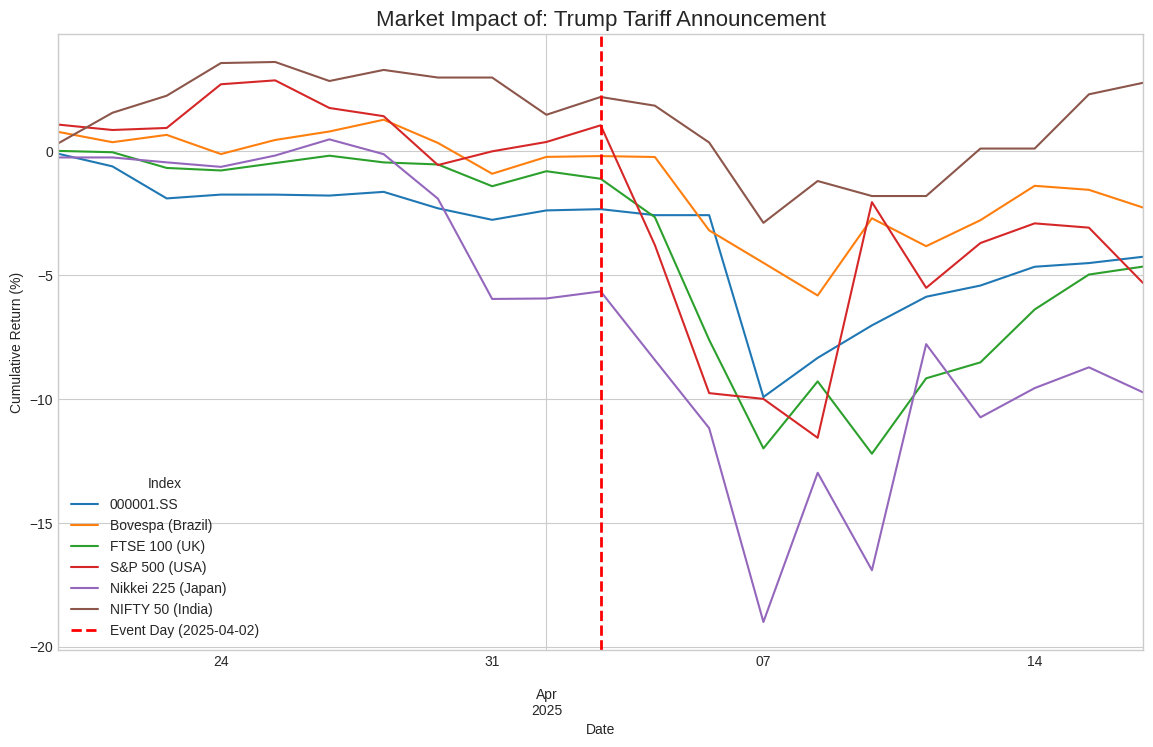


--- All event analyses are complete. ---


In [7]:
# --- Loop Through All Events and Generate Plots ---

print("--- Generating Impact Analysis for All 15 Geopolitical Events ---")

# Iterate over each row in our df_events DataFrame
for index, row in df_events.iterrows():
    event_name = row['Event']
    event_date = row['Date']

    # Call our function to generate a plot for the current event
    plot_event_impact(event_name, event_date, daily_returns)

print("\n--- All event analyses are complete. ---")

Normalized all index prices to a starting value of 100.


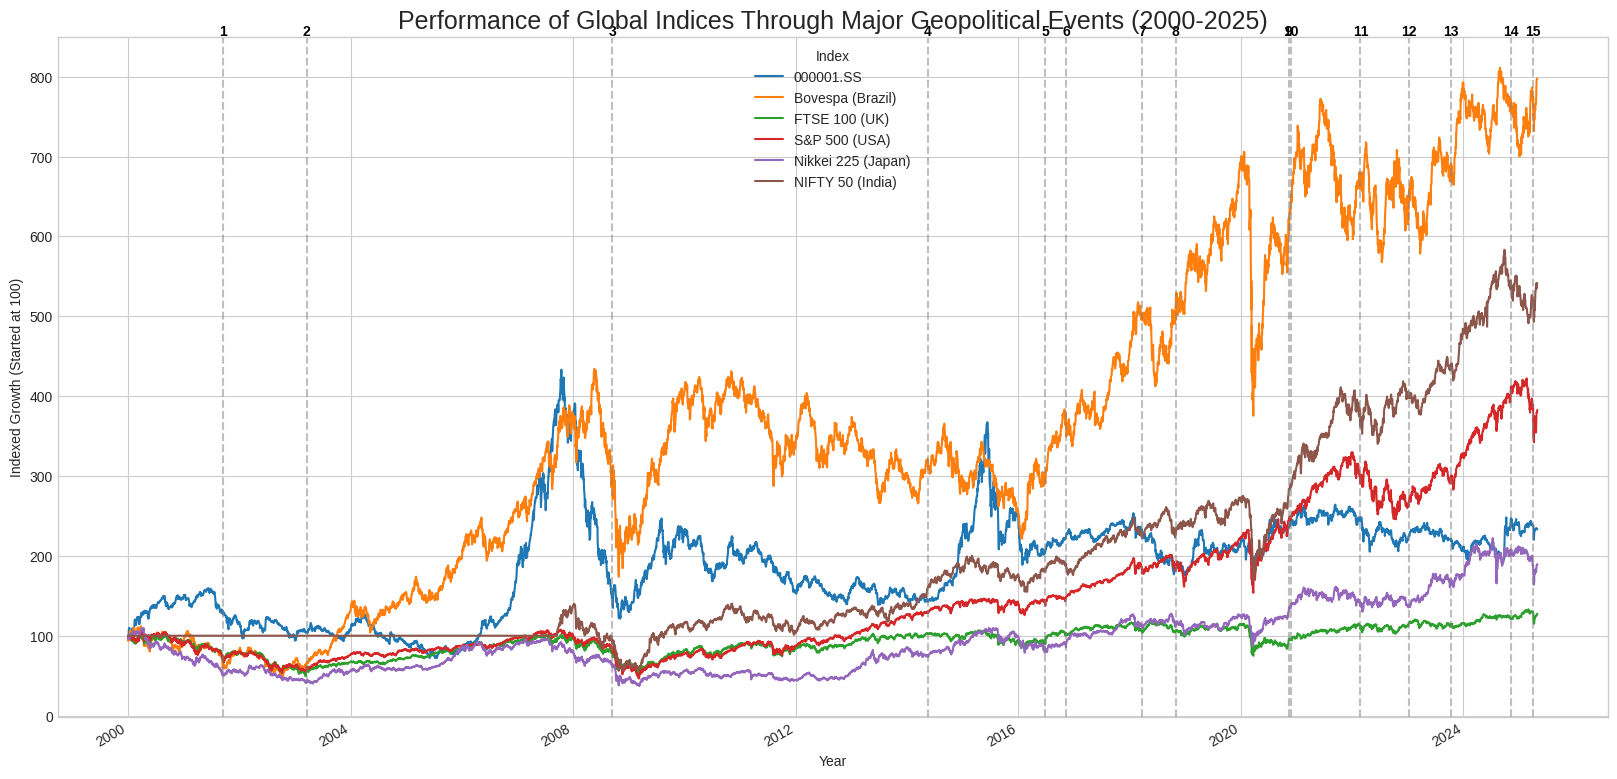

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create the Master Timeline Visualization ---

# 1. Normalize the price data to a baseline of 100
# We divide every price by the very first price in the series and multiply by 100.
normalized_prices = (close_prices / close_prices.iloc[0]) * 100

print("Normalized all index prices to a starting value of 100.")

# 2. Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 10))

# Plot the normalized price lines
normalized_prices.plot(ax=plt.gca())

# 3. Add vertical lines and annotations for each event
# We'll place a text number at the top of the chart for each event
y_pos = normalized_prices.max().max() * 1.05 # Position annotations just above the highest line

for i, row in df_events.iterrows():
    event_date = row['Date']
    event_name = row['Event']
    # Draw a subtle vertical line
    plt.axvline(x=event_date, color='grey', linestyle='--', alpha=0.5)
    # Add a numbered annotation
    plt.text(x=event_date, y=y_pos, s=str(i+1), horizontalalignment='center', color='black', weight='bold')

# 4. Add titles and labels
plt.title('Performance of Global Indices Through Major Geopolitical Events (2000-2025)', fontsize=18)
plt.ylabel('Indexed Growth (Started at 100)')
plt.xlabel('Year')
plt.legend(title='Index')
plt.grid(True)

plt.show()

In [9]:
# --- Print the Numbered Event Legend ---

print("--- Event Legend for the Chart Above ---")
for i, row in df_events.iterrows():
    # We use i+1 to have a 1-based index for our legend
    print(f"  {i+1}: {row['Date'].date()} - {row['Event']}")

--- Event Legend for the Chart Above ---
  1: 2001-09-17 - 9/11 Attacks (Market Re-opens)
  2: 2003-03-20 - Start of Iraq War
  3: 2008-09-15 - Collapse of Lehman Brothers
  4: 2014-05-16 - Narendra Modi Elected in India
  5: 2016-06-24 - Brexit Referendum Result
  6: 2016-11-09 - Donald Trump 2016 Election Victory
  7: 2018-03-22 - Start of US-China Trade War
  8: 2018-10-29 - Jair Bolsonaro Elected in Brazil (Market Reaction)
  9: 2020-11-09 - Joe Biden 2020 Election Victory
  10: 2020-11-26 - Start of Major Farmer Protests in India
  11: 2022-02-24 - Full-scale Invasion of Ukraine
  12: 2023-01-09 - Attack on Brazilian Congress (Market Reaction)
  13: 2023-10-09 - Start of Israel-Hamas War
  14: 2024-11-06 - Donald Trump 2024 Election Victory
  15: 2025-04-02 - Trump Tariff Announcement


Calculating 30-day rolling volatility...
Volatility calculation complete.
Generating volatility timeline chart...


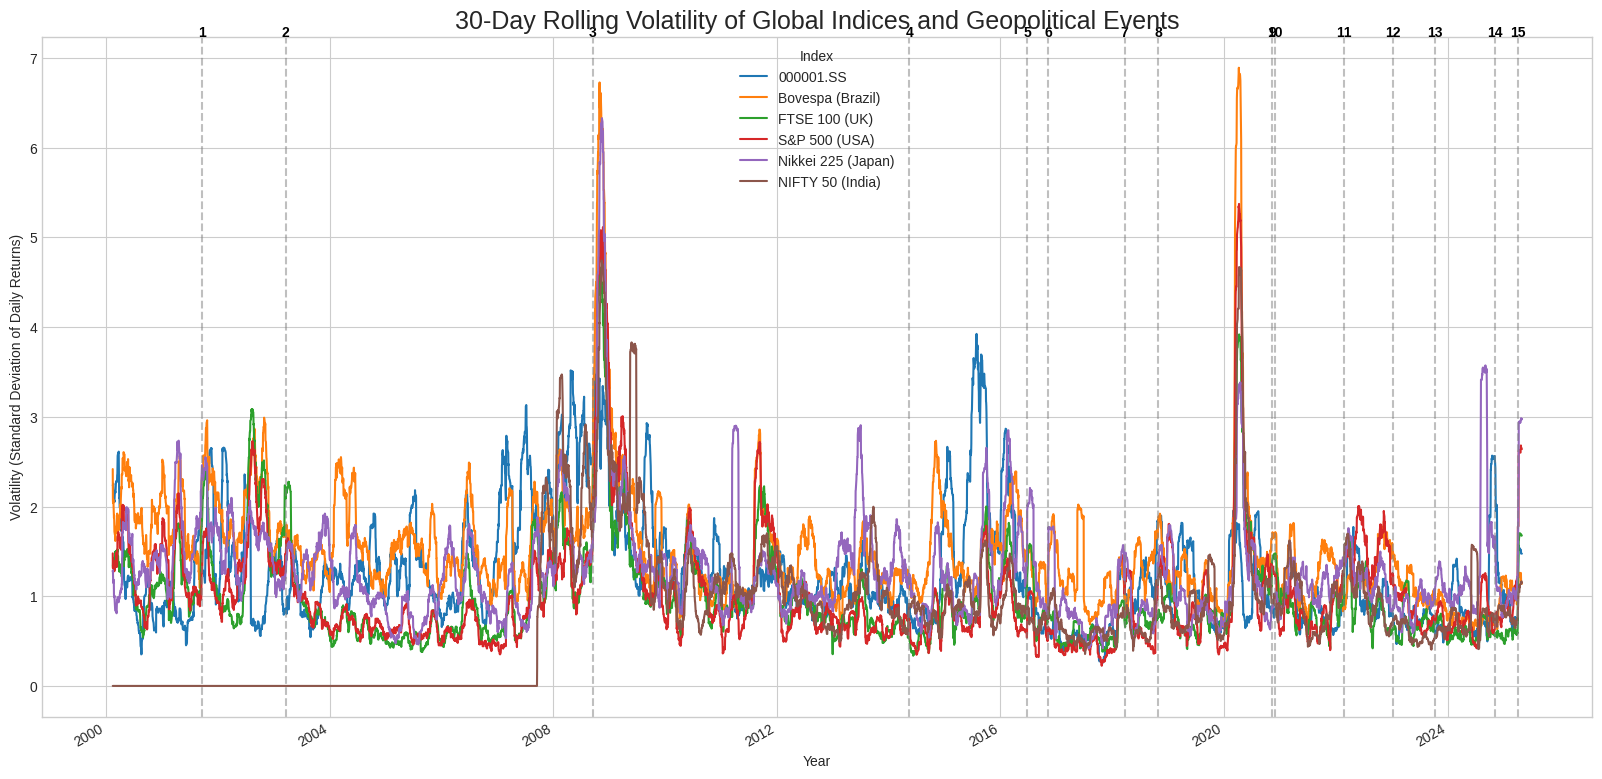


--- Event Legend for the Chart Above ---
  1: 2001-09-17 - 9/11 Attacks (Market Re-opens)
  2: 2003-03-20 - Start of Iraq War
  3: 2008-09-15 - Collapse of Lehman Brothers
  4: 2014-05-16 - Narendra Modi Elected in India
  5: 2016-06-24 - Brexit Referendum Result
  6: 2016-11-09 - Donald Trump 2016 Election Victory
  7: 2018-03-22 - Start of US-China Trade War
  8: 2018-10-29 - Jair Bolsonaro Elected in Brazil (Market Reaction)
  9: 2020-11-09 - Joe Biden 2020 Election Victory
  10: 2020-11-26 - Start of Major Farmer Protests in India
  11: 2022-02-24 - Full-scale Invasion of Ukraine
  12: 2023-01-09 - Attack on Brazilian Congress (Market Reaction)
  13: 2023-10-09 - Start of Israel-Hamas War
  14: 2024-11-06 - Donald Trump 2024 Election Victory
  15: 2025-04-02 - Trump Tariff Announcement


In [10]:
# --- Volatility Analysis ---

# We will calculate the 30-day rolling standard deviation of daily returns.
# This is a common measure of historical volatility.
print("Calculating 30-day rolling volatility...")
rolling_volatility = daily_returns.rolling(window=30).std()

print("Volatility calculation complete.")

# --- Visualize Volatility Over Time ---
print("Generating volatility timeline chart...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 10))

# Plot the rolling volatility
rolling_volatility.plot(ax=plt.gca())

# Add the same vertical lines and annotations for each event
y_pos = rolling_volatility.max().max() * 1.05
for i, row in df_events.iterrows():
    event_date = row['Date']
    plt.axvline(x=event_date, color='grey', linestyle='--', alpha=0.5)
    plt.text(x=event_date, y=y_pos, s=str(i+1), horizontalalignment='center', color='black', weight='bold')

# Add titles and labels
plt.title('30-Day Rolling Volatility of Global Indices and Geopolitical Events', fontsize=18)
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.xlabel('Year')
plt.legend(title='Index')
plt.grid(True)

plt.show()

# --- Also print the event legend again for this new chart ---
print("\n--- Event Legend for the Chart Above ---")
for i, row in df_events.iterrows():
    print(f"  {i+1}: {row['Date'].date()} - {row['Event']}")